# 【枠回しのアルゴリズム】

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import copy

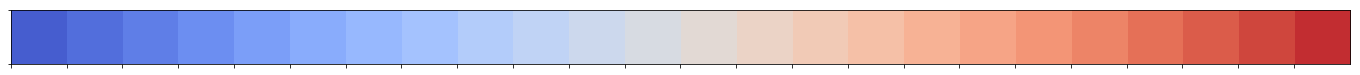

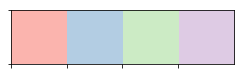

In [2]:
# sns.choose_colorbrewer_palette("qualitative")で、色の指定;
sns.palplot(sns.color_palette("coolwarm", 24))
sns.palplot(sns.color_palette("Pastel1", 4))

## 実際に算出された号数を用いて実践する

In [3]:
# サンプルデータの確認。
!ls sample/

df_CCJC_sample.txt  df_Monde_sample.txt  df_kao_sample.txt
df_GSK_sample.txt   df_SB_sample.txt


In [4]:
df_a = pd.read_csv('sample/df_CCJC_sample.txt', index_col=0)
df_b = pd.read_csv('sample/df_Monde_sample.txt', index_col=0)
df_c = pd.read_csv('sample/df_kao_sample.txt', index_col=0)
df_d = pd.read_csv('sample/df_GSK_sample.txt', index_col=0)
df_e = pd.read_csv('sample/df_SB_sample.txt', index_col=0)

***
***
<b>　指定階層ごとの枠視聴率の相関係数を調べる。<br>
　「相関係数が小さい＝交換する価値が高い」ことに注意</b>

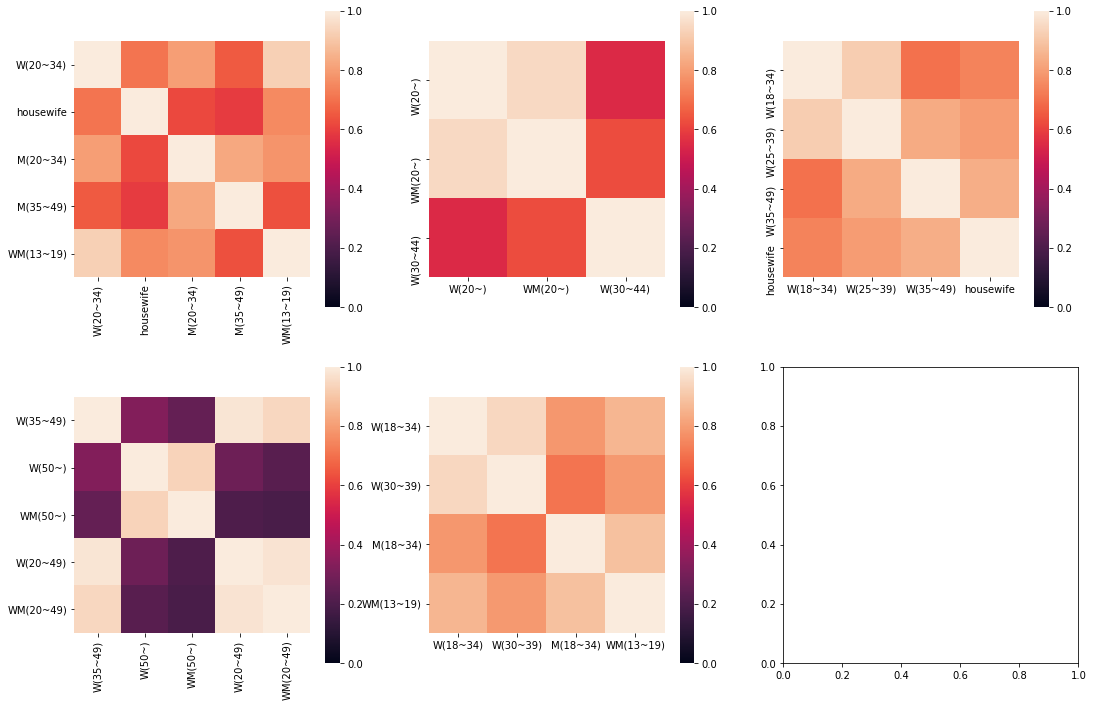

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.heatmap(df_a.drop(['世帯','◆ＡＬＬ','号数(6)'], axis=1).corr(),vmax=1,vmin=0,square=True,ax=axes[0, 0])
sns.heatmap(df_b.drop(['世帯','◆ＡＬＬ','号数(6)'], axis=1).corr(),vmax=1,vmin=0,square=True,ax=axes[0, 1])
sns.heatmap(df_c.drop(['世帯','◆ＡＬＬ','号数(6)'], axis=1).corr(),vmax=1,vmin=0,square=True,ax=axes[0, 2])
sns.heatmap(df_d.drop(['世帯','◆ＡＬＬ','号数(6)'], axis=1).corr(),vmax=1,vmin=0,square=True,ax=axes[1, 0])
sns.heatmap(df_e.drop(['世帯','◆ＡＬＬ','号数(6)'], axis=1).corr(),vmax=1,vmin=0,square=True,ax=axes[1, 1])
plt.show()

***
***

In [6]:
print('クライアントaのデータ数:{}'.format(len(df_a)))
print('クライアントbのデータ数:{}'.format(len(df_b)))
print('クライアントcのデータ数:{}'.format(len(df_c)))
print('クライアントdのデータ数:{}'.format(len(df_d)))
print('クライアントeのデータ数:{}'.format(len(df_e)))

クライアントaのデータ数:1220
クライアントbのデータ数:59
クライアントcのデータ数:1998
クライアントdのデータ数:482
クライアントeのデータ数:107


## 様々なデータの分布の確認

In [7]:
# 全てのデータを連結する。
df_all = pd.concat([df_a.loc[:, ["世帯","号数(6)"]],
                    df_b.loc[:, ["世帯","号数(6)"]],
                    df_c.loc[:, ["世帯","号数(6)"]],
                    df_d.loc[:, ["世帯","号数(6)"]],
                    df_e.loc[:, ["世帯","号数(6)"]]])

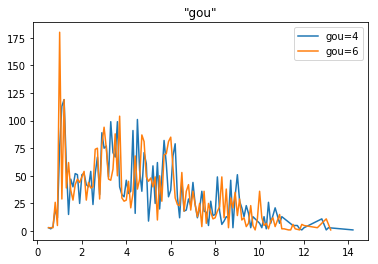

In [8]:
# 単純に、号数ごとの値を見ている。
plt.plot(df_all.groupby('世帯').size(), label='gou=4')
plt.plot(df_all.groupby('号数(6)').size(), label='gou=6')
plt.title('"gou"')
plt.legend()
plt.show()

In [9]:
df_all.corr()

,世帯,号数(6)
世帯,1.000000,0.989633
号数(6),0.989633,1.000000


In [10]:
df_all['号数の差'] = df_all['世帯'] - df_all['号数(6)']

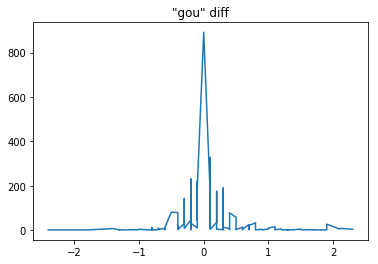

In [11]:
# 号数の差。
plt.plot(df_all.groupby('号数の差').size())
plt.title('"gou" diff')
plt.show()

<b>号数が変わることによる予測視聴率の差は、かなりとがった(分散の小さい)正規分布に従うことがわかる。</b>

***

<b>データ量の関係から、今回はクライアントaとcを用いて指定枠の違いによる予測視聴率の差を見る。</b>

<b>※なお、今回はAが有利な方、Bが不利な方となっている。</b>

In [45]:
df_A = df_c.loc[:, ['世帯','号数(6)','housewife','W(18~34)']]
df_B = df_a.loc[:, ['世帯','号数(6)','housewife','W(20~34)']]
df_A.columns=['A_gou', 'B_gou', 'A_target','B_target']
df_B.columns = df_A.columns

In [46]:
df = pd.concat([df_A, df_B])

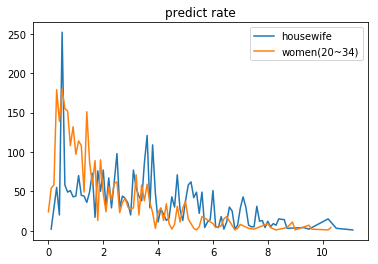

In [47]:
# 指定階層ごとの予測視聴率。
plt.plot(df.groupby('A_target').size(), label='housewife')
plt.plot(df.groupby('B_target').size(), label='women(20~34)')
plt.title('predict rate')
plt.legend()
plt.show()

In [48]:
# 視聴率の上昇具合には同じ傾向があることが確認された。
df.loc[:, ['A_target', 'B_target']].corr()

,A_target,B_target
A_target,1.000000,0.749088
B_target,0.749088,1.000000


In [49]:
df.mean()

A_gou       4.589932
B_gou       4.585333
A_target    3.306805
B_target    1.943847
dtype: float64

<b>視聴率の分布にそこまで差はないように感じるが…</b>

In [50]:
df['階層間格の視聴率差'] = df['A_target'] - df['B_target']
df = df.round(1)

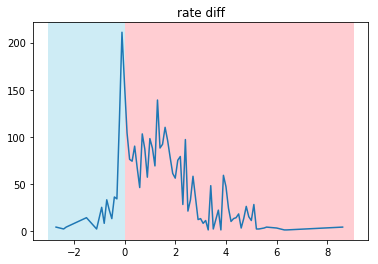

In [51]:
# 号数の差。
plt.plot(df.groupby('階層間格の視聴率差').size())
plt.title('rate diff')
plt.axvspan(-3,0,color="#CEECF5")
plt.axvspan(0,9,color="#ffcdd2")
plt.show()

<b>概ねどの枠に対しても、主婦の方が20~34才の女性よりも視聴率が高い（もしくは変わらない）という結果が出た。<br>
これより、ターゲットの層による視聴率の格差はかなり大きいものと予測されるため、これを考慮に入れる必要があると考えられる。</b>

***

## アルゴリズム

<b>※なお、今回はAが有利な方、Bが不利な方となっている。</b>

In [52]:
# 利用するデータ。
df_A = df_c.loc[:, ['世帯','号数(6)','housewife','W(18~34)']]
df_B = df_a.loc[:, ['世帯','号数(6)','housewife','W(20~34)']]
df_A.columns=['A_gou', 'B_gou', 'A_target','B_target']
df_B.columns = df_A.columns

In [53]:
# データの確認
display(df_A.head(1))
display(df_B.head(1))

,A_gou,B_gou,A_target,B_target
0,10.4,10.0,8.1,5.7


,A_gou,B_gou,A_target,B_target
0,8.7,6.6,6.5,3.9


***

<b>
    　枠回しの条件は、
    - 号数は変わらない（ほんの少しUPは「許容」）
    - 視聴率は、上昇する（もしくは、変わらない。）
</b>
<b>
    　ここで、<font color='Red'>交換に使用する枠の選び方</font>が問題であり、例えば「交換して予測視聴率が大きく上がるもの」という選択の仕方をすると、主婦をターゲットにしているクライアントは、先ほどの図の<font color='#CEECF5'>水色部分</font>しか交換に出せなくなり、あまり良い結果に結びつくとは考えにくい。<br>
    　しかしその一方で「全ての枠」という選択の仕方をすると、交換したら予測視聴率が8も下がるような枠を出される可能性があり、それはそれで良い結果に結びつくとは考えにくい。
</b>

<b>
    　以上の考察から、有利な側（ここでは主婦側。自分の方が予測視聴率が高い枠が多い側）は<font color='Red'>ある閾値を用い、それより高いものだけを交換に利用する</font>という方法をとる。<br>
    　閾値の選び方は平均値、中央値、第三四分位点、などの方法があるが、それは後々調整する。<br>
    　不利な側は、「全ての枠」を出しても良いし、「交換して予測視聴率が大きく上がるもの」だけを出しても良い。ここも調整する。
<br>

In [54]:
# 枠を全て結合し、平均値を求めて比較する。
df = pd.concat([df_A, df_B])
print("Aのターゲット階層の平均予測視聴率は{}であり、".format(round(df["A_target"].mean(),2)))
print("Bのターゲット階層の平均予測視聴率は{}である。" .format(round(df["B_target"].mean(),2)))

Aのターゲット階層の平均予測視聴率は3.31であり、
Bのターゲット階層の平均予測視聴率は1.94である。


<b>今回はクライアントAの方が有利なので、調整が必要！</b>

In [56]:
# value_diffは、『相手に交換した時にどれだけ良くなるか』を示していることに注意！！
df_A['A_value'] = df_A['A_target']/df_A['A_gou']
df_A['B_value'] = df_A['B_target']/df_A['B_gou']
df_A['value_diff'] = df_A['B_value'] - df_A['A_value']

df_B['A_value'] = df_B['A_target']/df_B['A_gou']
df_B['B_value'] = df_B['B_target']/df_B['B_gou']
df_B['value_diff'] = df_B['A_value'] - df_B['B_value']

In [57]:
# 分布を確認するために、結合したデータフレームでも同じことを行う。
df['A_value'] = df['A_target']/df['A_gou']
df['B_value'] = df['B_target']/df['B_gou']

In [58]:
df = df.round(1) #めちゃめちゃざっくりした分布を確認するため。

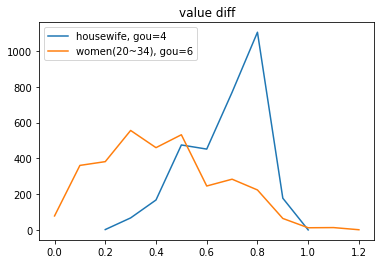

In [59]:
plt.plot(df.groupby('A_value').size(), label='housewife, gou=4')
plt.plot(df.groupby('B_value').size(), label='women(20~34), gou=6')
plt.title('value diff')
plt.legend()
plt.show()

In [60]:
print("Aは、Bに渡すと枠の'value'が平均的に{}高く、".format(round(df_A['value_diff'].mean(),3)))
print("Bは、Aに渡すと枠の'value'が平均的に{}高くなる。" .format(round(df_B['value_diff'].mean(),3)))

Aは、Bに渡すと枠の'value'が平均的に-0.309高く、
Bは、Aに渡すと枠の'value'が平均的に0.172高くなる。


<b>
    　この値 'value' は、クライアントごとに「ターゲット階層の予測視聴率」を「指定号数」で割った値の分布を表している。<br>
    　このことからも、単純に値だけを見ると主婦をターゲットとしているクライアントAの方が「有利」だとわかる。
</b>

### 【有利な方の処理】

#### ①交換したら上がる枠だけを残す

In [72]:
df_A_pickup = df_A[df_A["value_diff"]>0]
print("データ数は、{} から {} へと減少".format(len(df_A),len(df_A_pickup)))

データ数は、1998 から 125 へと減少


#### ②もう少し制限を緩くする

<b><li>0以上→-0.X以上</li></b>

In [63]:
df_A_pickup = df_A[df_A["value_diff"]>-0.1] 
print("データ数は、{} から {} へと減少".format(len(df_A),len(df_A_pickup)))

データ数は、1998 から 353 へと減少


<b><li>上からいくつ</li></b>

In [64]:
# 値を分ける。
N_cut = 5
labels = [i+1 for i in range(N_cut)]
df_temp = pd.concat([df_A,
                     pd.qcut(df_A['value_diff'], N_cut, labels=labels, retbins=False).rename(columns={'value_diff':0})],
                    axis=1)

In [65]:
# 0のカラムが、大きさごとに分けるラベルの役割をしている。
df_temp.head(3)

,A_gou,B_gou,A_target,B_target,A_value,B_value,value_diff,0
0,10.4,10.0,8.1,5.7,0.778846,0.570000,-0.208846,4
1,6.1,6.6,5.4,4.1,0.885246,0.621212,-0.264034,4
2,6.1,6.6,5.4,4.1,0.885246,0.621212,-0.264034,4


In [66]:
# 分かれた後の数の分布。
df_temp.groupby(0).size()

0
1    402
2    399
3    411
4    404
5    382
dtype: int64

In [67]:
# 分かれた後の平均値。
df_temp.groupby(0)['value_diff'].mean()

0
1   -0.578126
2   -0.441195
3   -0.341915
4   -0.170396
5    0.001874
Name: value_diff, dtype: float64

<b>（この分け方だと、「label ( index ) の値が小さい」＝「vallue_diffも小さい」という関係だということがわかる。）</b>

In [68]:
# 上昇率が上位(3/5)のものを利用することにする。（あまりにも小さいものは使えないため。）
df_A_pickup = df_temp[df_temp[0] >= 3].reset_index(drop=True)
print("データ数は、{} から {} へと減少".format(len(df_A),len(df_A_pickup)))

データ数は、1998 から 1197 へと減少


### 【不利な方の処理】

<b>　既に持っており、自分の場所にある方が良い枠を渡してしまうのは勿体無いので、それだけ防ぐ。</b>

In [69]:
# value_diff > 0 ↔︎相手の方が良い枠のみにする。
df_B_pickup = df_B[df_B['value_diff']>0].reset_index(drop=True)
print("データ数は、{} から {} へと減少".format(len(df_B),len(df_B_pickup)))

データ数は、1220 から 735 へと減少


<b>　ここまでで、交換に利用するデータの抽出は完了した。<br>
　<font color='Red'>※なお、有利な方であるAは、交換したら上がるものしか選んでない！！</font></b>

***
***

### 【プログラムの中身】
<b>
    　ここまでで選んだ枠の号数の和を計算する。<br>
    →小さい方の枠を、「全て交換に利用する」とする。<br>
    →その枠で、号数(小)/号数(大)が計算できる。<br>
    →大きい方は、号数(小)/号数(大)が上記の値と一致（ほんの少しでかくなるはOK）しつつ号数(大)が一致する（ほんの少し小さくなるはOK）ように枠を取得して行く。

In [76]:
# データの確認
display(df_A_pickup.head(3))
display(df_B_pickup.head(3))

,A_gou,B_gou,A_target,B_target,A_value,B_value,value_diff
77,2.3,2.6,1.3,2.2,0.565217,0.846154,0.280936
86,2.9,3.3,1.8,2.2,0.620690,0.666667,0.045977
104,4.6,4.7,3.6,4.2,0.782609,0.893617,0.111008


,A_gou,B_gou,A_target,B_target,A_value,B_value,value_diff
0,8.7,6.6,6.5,3.9,0.747126,0.590909,0.156217
1,5.7,5.5,4.2,3.5,0.736842,0.636364,0.100478
2,5.7,5.5,4.2,3.5,0.736842,0.636364,0.100478


In [77]:
print("Aの選んだ枠は、A指定の号数だと{}で、B指定の号数だと{}".format(df_A_pickup['A_gou'].sum(),df_A_pickup['B_gou'].sum()))
print("Bの選んだ枠は、A指定の号数だと{}で、B指定の号数だと{}".format(df_B_pickup['A_gou'].sum(),df_B_pickup['B_gou'].sum()))

Aの選んだ枠は、A指定の号数だと525.5で、B指定の号数だと524.4
Bの選んだ枠は、A指定の号数だと3443.1で、B指定の号数だと3402.6


In [78]:
len(df_A_pickup)

125

In [79]:
len(df_B_pickup)

735

<b>　ともに有利なAの選んだ枠数の方が小さいので、これらの枠を全て交換に利用するとする。</b>

In [80]:
# それぞれの値を計算する。
A_gou_aim = df_A_pickup['A_gou'].sum()
B_gou_aim = df_A_pickup['B_gou'].sum()
A_B_rate_aim = B_gou_aim/A_gou_aim

In [81]:
# つまるとこと
print('基準合計号数は {} で、\n基準号数割合は {} である。'.format(A_gou_aim, round(A_B_rate_aim,3)))

基準合計号数は 525.5 で、
基準号数割合は 0.998 である。


<b>　ここで、$\text{Aの合計指定号数（分母）}$を<font color='Red'>基準合計号数</font><br>
$\frac{\text{Bの合計指定号数}}{\text{Aの合計指定号数}}$を<font color="Red">基準号数割合</font>と定めている。</b>

<b>　したがって、クライアントBは、基準合計号数、基準号数割合が等しくなるように枠を取っていく必要があるが、以下の少しだけ緩めた条件がある。
<li>①基準合計号数は、多少多くて良い（多い＝高い枠をあげていることになるから）</li>
<li>②基準号数割合は、多少少なくて良い（逆向きで考えれば納得。しかも①で分母が多い。</li>
</b>

***
<b>　じゃあ、これをどうやるか</b>

In [82]:
# 上記の値と同じカラムを作成する。
df_B_pickup['B/A_rate'] = df_B_pickup['B_gou']/df_B_pickup['A_gou']

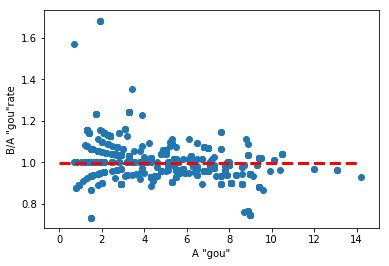

In [83]:
# 散布図。青線が目標値。
plt.xlabel('A "gou"')
plt.ylabel('B/A "gou"rate')
plt.hlines(y=A_B_rate_aim, xmin=0, xmax=df_B_pickup['A_gou'].max(), colors='red', linestyles='dashed', linewidths=3)
plt.scatter(df_B_pickup['A_gou'], df_B_pickup['B/A_rate'])
plt.show()

<b>　とりあえず取っていき、rateが目標の値に近づくようにバイアスをかけながら取りに行き、最終的に目標値付近で収束して微調整というのが理想。`AdaGrad`的なイメージ。（以下の計算式参照）ただし、この場合計算量はどれぐらいになるだろうか…</b>

<div style="text-align: center;">
    $h_{0} = \epsilon\\
    h_{t} = h_{t−１} + (R_{aim} - R_{t})^{2}\\
    \eta_{t} = \frac{\eta_{0}}{\sqrt{h_{t}}}\\
    R_{t+1} = R_{t} - 2 \eta_{t} (R_{aim} - R_{t})$
</div>

<b>　この時、最初の値を最大値（らへん）にし、$\eta_{0}=1$とすればいけるような気がしている。</b>

In [84]:
# 使用する値は、この2カラム。
df_B_pickup.loc[:2, ['A_gou', 'B/A_rate']]

,A_gou,B/A_rate
0,8.7,0.758621
1,5.7,0.964912
2,5.7,0.964912


<b>　numpyの方が計算が早いので、numpyを利用する。</b>

In [85]:
A_arr = df_B_pickup['A_gou'].values # 持っている号数。
R_arr = df_B_pickup['B/A_rate'].values # 持っている号数割合。

In [86]:
# 初期化。
A_aim = A_gou_aim    # 号数の目標値 
B_aim = B_gou_aim    # 号数の目標値（こっちは割合で代用。）
R_aim = A_B_rate_aim # 比率の目標値
R_n = min(R_arr)     # R0を今持っている値の最小値で初期化。
h_n = 1              # h0を1で初期化
eta_0 = 1            # eta0を１で初期化

In [87]:
print('基準合計号数は {} Bの目標号数は {} で、基準号数割合は {} である。'.format(round(A_aim,4), round(B_aim,4), round(R_aim,4)))
print('最初に取りに行く比率は {} である。'.format(round(R_n,4)))
print('hの初期値は {} である。'.format(h_n))
print('η(学習率)の初期値は {} である。'.format(eta_0))

基準合計号数は 525.5 Bの目標号数は 524.4 で、基準号数割合は 0.9979 である。
最初に取りに行く比率は 0.7333 である。
hの初期値は 1 である。
η(学習率)の初期値は 1 である。


***

## 【メインプログラム】

In [88]:
# np.arrayからある値numに最も近い値とそのindexを返す関数
def getNearestValue(arr, num):
    """
    @param arr: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """
    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(arr) - num).argmin()
    return arr[idx], idx

In [89]:
def main(Y_aim, X_aim, X_arr_, R_aim, R_arr_, R_n, h_n=1, eta_0=1):
    """
    【引数の意味】
    @param Y_aim : 目標となる合計号数値(B) 割合で代用されているため値評価用
    @param X_aim : 目標となる合計号数値(A) 基準合計号数
    @param X_arr_: 枠の号数の値
    @param R_aim : 基準号数割合
    @param R_arr_: 枠の号数の比率
    @param R_n   : 最初にとる値(今回は最小値)
    @param h_n   : h0の初期値
    @param eta_0 : ηの初期値
    @return 取得した全index
    
    【関数の中での値の意味】
    @param R_n           : 取った枠の号数割合
    @param idx           : 取った枠のindex
    @param Y_aim         : 目標号数(B)までの値
    @param X_arr[idx]*Rn : 取った枠のAの号数
    """
    start = time.time()
    
    idxes = [] # とった枠のindexを入れていく。
    X_arr = copy.deepcopy(X_arr_) # 参照先の違うオブジェクトを作成することで、
    R_arr = copy.deepcopy(R_arr_) # 関数内で利用されても値を変えないようにする。
    while(X_aim>0):
        R_n, idx = getNearestValue(R_arr, R_n) # 目標の割合に最も近いものを計算する。
        X_aim -= X_arr[idx] # 目標値から引いていく。
        Y_aim -= X_arr[idx]*R_n # 目標値から引いていく。（検証用）
        """値の更新"""
        h_n += (R_aim-R_n)**2 # hnの値を更新する。
        eta_n = eta_0/h_n**(1/2) # etaの値も更新する。
        R_n = R_n + 2*eta_n*(R_aim-R_n) # Rnの値を更新する。
        """後処理"""
        R_arr[idx] = -100 # -100で値を修正する。（もう一度選ばれることを避けるため）
        idxes.append(idx) # indexを格納していく。
        
    end = time.time()
    print("処理時間は {} 秒でした。".format(np.round((end-start), 3)))
    print("ηの最終的な値は {} で、h の最終的な値は {} でした。".format(round(eta_n,4), round(h_n,4)))
    print("最後に取った枠の比率は {} で、目指していた比率は {} でした。".format(round(R_n,4), round(R_aim,4)))
    print("結果的にBの号数(多少多くてOK)は {} だけ目標値を上回りました。".format(round(-X_aim, 4)))
    print("結果的にAの号数(多少少なくてOK)は {} だけ目標値を上回りました。".format(round(-Y_aim, 4)))
    return idxes

In [90]:
get_idxes = main(B_aim, A_aim, A_arr, R_aim, R_arr, R_n)

処理時間は 0.003 秒でした。
ηの最終的な値は 0.8921 で、h の最終的な値は 1.2565 でした。
最後に取った枠の比率は 0.9963 で、目指していた比率は 0.9979 でした。
結果的にBの号数(多少多くてOK)は 0.8 だけ目標値を上回りました。
結果的にAの号数(多少少なくてOK)は -1.1 だけ目標値を上回りました。


***
***

## 【結果の可視化】

In [91]:
def plot_grouping(get_indexes, df, R_aim):
    """
    関数の概要:時間ごとのタイムシフトを表示する。
    @param get_indexes : 獲得した枠のindex
    @paarm df          : 枠数が多かった（不利な方）の枠データ
    @param R_aim       : 目標としていた割合
    """

    N_index = len(get_indexes)//3 # 1/3ずつグルーピングしていく。
    remain_idxes = list(set(df.index) - set(get_indexes)) # 取られなかったインデックス。

    plt.scatter(df.loc[get_indexes[:N_index]]['A_gou'], df.loc[get_indexes[:N_index]]['B/A_rate'],c="red", label='1/3')
    plt.scatter(df.loc[get_indexes[N_index:2*N_index]]['A_gou'], df.loc[get_indexes[N_index:2*N_index]]['B/A_rate'],c="blue", label='2/3')
    plt.scatter(df.loc[get_indexes[2*N_index:]]['A_gou'], df.loc[get_indexes[2*N_index:]]['B/A_rate'],c="green", label='3/3')
    plt.scatter(df.loc[remain_idxes]['A_gou'], df.loc[remain_idxes]['B/A_rate'],c="yellow", label='remain')
    plt.hlines(y=R_aim, xmin=0, xmax=max(df_B_pickup['A_gou']), colors='black', linestyles='dashed', linewidths=3)
    plt.title('Grouping')
    plt.xlabel('A "gou"')
    plt.ylabel('B/A "gou"rate')
    plt.legend(loc='lower right')
    plt.show()

In [92]:
def plot_timeshift(get_ids, df, R_aim):
    """
    関数の概要:時間ごとのタイムシフトを表示する。
    @param get_ids : 獲得した枠のindex
    @paarm df      : 枠数が多かった（不利な方）の枠データ
    @param R_aim   : 目標としていた割合
    """
    current_A_gou_sum=0
    current_B_gou_sum=0
    A_gou_time_shift=[]
    rate_time_shift=[]
    for i in range(len(get_ids)):
        index = get_ids[i]
        current_B_gou_sum+=df["B_gou"][index]
        current_A_gou_sum+=df["A_gou"][index]
        A_gou_time_shift.append(current_A_gou_sum)
        rate_time_shift.append(current_B_gou_sum/current_A_gou_sum)
    
    N_index = len(get_ids)//3 # 1/3ずつグルーピングしていく。
    # plt.scatter(A_gou_time_shift, df.loc[get_ids,['B/A_rate']], label='get rate')
    plt.plot(A_gou_time_shift, df.loc[get_ids,['B/A_rate']], label='get rate')
    plt.plot(A_gou_time_shift, rate_time_shift, label='ave rate')
    plt.plot(A_gou_time_shift, [R_aim for i in range(len(A_gou_time_shift))],c="black", alpha=0.5, label='aim rate')
    plt.axvspan(0,A_gou_time_shift[N_index],color="red",alpha=0.2)
    plt.axvspan(A_gou_time_shift[N_index],A_gou_time_shift[2*N_index],color="blue",alpha=0.2)
    plt.axvspan(A_gou_time_shift[2*N_index],A_gou_time_shift[-1],color="green",alpha=0.2)
    plt.xlabel('A "gou"')
    plt.ylabel('B/A "gou"rate')
    plt.title('Time shift')
    plt.legend()
    plt.show()

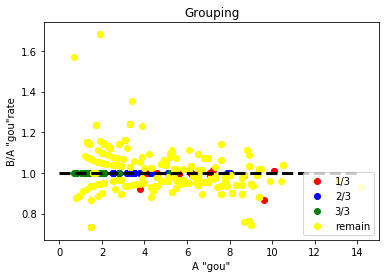

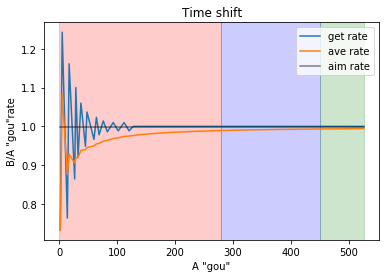

In [93]:
plot_grouping(get_idxes, df_B_pickup, R_aim)
plot_timeshift(get_idxes, df_B_pickup, R_aim)

<b>
    　結構いい感じで取得できている。<br>
    　この後の改善点は、<br>
    - 目標軸上の点を先にとってしまっているので、それを避ける。
      1. 学習率を高める
      2. ある閾値を決めて、近くは最後まで取らないようにする。
    - 最後の処理(今は超えたら終了になっているが、Bの方も合わせる)を行う。
    - 他のデータでもいけるかを試す。
</b>

***
***

<b>・学習率を高めてみる。</b>

In [94]:
get_idxes = main(B_aim, A_aim, A_arr, R_aim, R_arr, R_n, eta_0=1.5)

処理時間は 0.003 秒でした。
ηの最終的な値は 0.909 で、h の最終的な値は 2.7229 でした。
最後に取った枠の比率は 0.9962 で、目指していた比率は 0.9979 でした。
結果的にBの号数(多少多くてOK)は 0.3 だけ目標値を上回りました。
結果的にAの号数(多少少なくてOK)は -11.4 だけ目標値を上回りました。


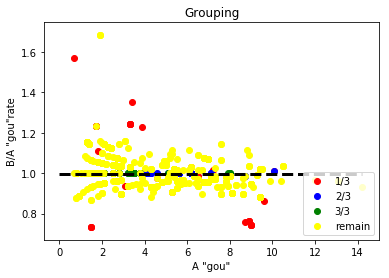

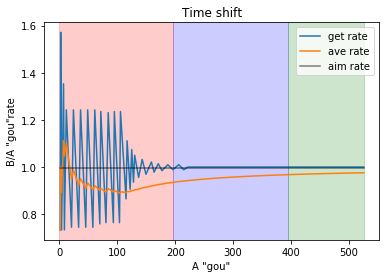

In [95]:
plot_grouping(get_idxes, df_B_pickup, R_aim)
plot_timeshift(get_idxes, df_B_pickup, R_aim)

In [96]:
get_idxes = main(B_aim, A_aim, A_arr, R_aim, R_arr, R_n, eta_0=2)

処理時間は 0.003 秒でした。
ηの最終的な値は 0.9812 で、h の最終的な値は 4.1549 でした。
最後に取った枠の比率は 0.9589 で、目指していた比率は 0.9979 でした。
結果的にBの号数(多少多くてOK)は 1.8 だけ目標値を上回りました。
結果的にAの号数(多少少なくてOK)は -18.5 だけ目標値を上回りました。


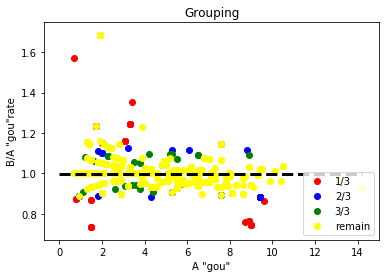

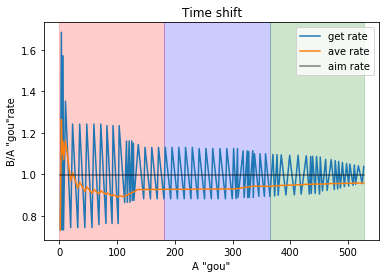

In [97]:
plot_grouping(get_idxes, df_B_pickup, R_aim)
plot_timeshift(get_idxes, df_B_pickup, R_aim)

<b>【メインプログラムの修正①】</b>

<div style="text-align: center;">
    $h_{0} = \epsilon\\
    h_{t} = h_{t−１} + (R_{aim} - R_{t})^{2}\\
    \eta_{t} = \frac{\eta_{0}}{\sqrt{h_{t}}}\\
    R_{t+1} = (R_{t} - 2 \eta_{t} (R_{aim} - R_{t}))\lambda_{t} + (1-\lambda_{t})R'_{t}\\
    \lambda_{t} = \lambda_{t-1}\frac{1}{\beta}\\
    R'_{t+1} = \frac{(A_{aim}R_{aim}-\sum_{i}^{t} R_{i}A_{i})}{A_{aim}-\sum_{i}^{t} A_{i}}
    $
</div>

In [128]:
def main(B_aim, A_aim, A_arr_, R_aim, R_arr_, R_n, h_n=1, eta_0=1, beta=1.01, λ_n=1,):
    """
    【引数の意味】
    @param B_aim : 目標となる合計号数値(B) 割合で代用されているため評価用
    @param A_aim : 目標となる合計号数値(A) 基準号数割合
    @param A_arr_: 持っている枠の号数の値
    @param R_aim : 目標となる号数割合
    @param R_arr_: 持っている枠の号数の比率
    @param R_n   : 最初にとる値(今回は最大値)
    @param h_n   : h0の初期値
    @param eta_0 : ηの初期値
    @param beta  : λの更新具合
    @param λ    : 比率を支配
    @return 取得した全index
    
    【関数の中での値の意味】
    @param R_n           : 取った枠の号数割合
    @param idx           : 取った枠のindex
    @param B_aim         : 目標号数(B)までの値
    @param A_arr[idx]*Rn : 取った枠のAの号数
    """
    start = time.time()
    
    idxes = [] # とった枠のindexを入れていく。
    A_arr = copy.deepcopy(A_arr_) # 参照先の違うオブジェクトを作成することで、
    R_arr = copy.deepcopy(R_arr_) # 関数内で利用されても値を変えないようにする。
    A_sum = 0
    B_sum = 0
    while(A_aim-A_sum>0):
        R_n, idx = getNearestValue(R_arr, R_n) # 目標の割合に最も近いものを計算する。
        A_sum += A_arr[idx] # 交換に出す枠の合計号数。
        B_sum += A_arr[idx]*R_n # 交換に出す枠の合計号数。
        """値の更新"""
        h_n += (R_aim-R_n)**2 # hnの値を更新する。
        eta_n = eta_0/h_n**(1/2) # etaの値も更新する。
        R_n_ = (A_aim*R_aim-B_sum)/(A_aim-A_sum) # 最終的に良い枠を取るための補正項。
        R_n = (R_n + 2*eta_n*(R_aim-R_n))*λ_n+(1-λ_n)*R_n_ # Rnの値を更新する。左辺がR_n+1を意味する。
        # ※ここでのR_nは、次はこの値の枠を取りたいなーってこと。
        λ_n = λ_n/beta
        """後処理"""
        R_arr[idx] = -100 # -100で値を修正する。（もう一度選ばれることを避けるため）
        idxes.append(idx) # indexを格納していく。
        
    end = time.time()
    print("処理時間は {} 秒でした。".format(np.round((end-start), 3)))
    print("ηの最終的な値は {} で、h の最終的な値は {} でした。".format(round(eta_n,4), round(h_n,4)))
    print("λの最終的な値は {} でした。".format(round(λ_n,4)))
    print("最後に取ろうとした枠の比率は {} で、目指していた比率は {} でした。".format(round(R_n,4), round(R_aim,4)))
    print("結果的にBの号数(多少少なくてOK)は {} だけ目標値を上回りました。".format(round(B_sum-B_aim, 4)))
    print("結果的にAの号数(多少多くてOK)は {} だけ目標値を上回りました。".format(round(A_sum-A_aim, 4)))
    return idxes

In [129]:
get_idxes = main(B_aim, A_aim, A_arr, R_aim, R_arr, R_n)

処理時間は 0.003 秒でした。
ηの最終的な値は 0.893 で、h の最終的な値は 1.254 でした。
λの最終的な値は 0.2483 でした。
最後に取ろうとした枠の比率は 0.9991 で、目指していた比率は 0.9979 でした。
結果的にBの号数(多少少なくてOK)は 1.3 だけ目標値を上回りました。
結果的にAの号数(多少多くてOK)は 1.3 だけ目標値を上回りました。


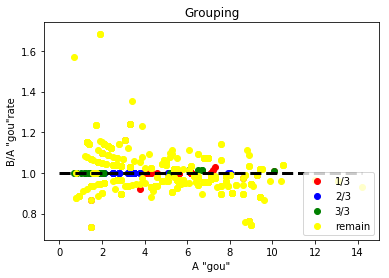

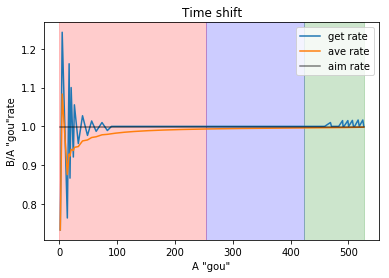

In [130]:
plot_grouping(get_idxes, df_B_pickup, R_aim)
plot_timeshift(get_idxes, df_B_pickup, R_aim)

<b>【メインプログラムの修正②】</b>

<b>　結果はだいぶ良くなっているのではないか？<br>
ただし、このサンプルのみに見合ったものを作成しても仕方がない。そこで、次は早いうちに周辺付近を取りに行ってしまっていることを直す。（αを導入し、これによって学習を抑えるパラメータである$h$の上昇具合（＝学習率 ${\eta}$） の抑えられ具合）を調整する。</b>

<div style="text-align: center;">
    $h_{0} = \epsilon\\
    h_{t} = h_{t−１} + (R_{aim} - R_{t})^{2\alpha}\\
    \eta_{t} = \frac{\eta_{0}}{\sqrt{h_{t}}}\\
    R_{t+1} = (R_{t} - 2 \eta_{t} (R_{aim} - R_{t}))\lambda_{t} + (1-\lambda_{t})R'_{t}\\
    \lambda_{t} = \lambda_{t-1}\frac{1}{\beta}\\
    R'_{t+1} = \frac{(A_{aim}R_{aim}-\sum_{i}^{t} R_{i}A_{i})}{A_{aim}-\sum_{i}^{t} A_{i}}
    $
</div>

In [131]:
def main(B_aim, A_aim, A_arr_, R_aim, R_arr_, R_n, h_n=1, eta_0=1, alpha=1, beta=1.01, λ_n=1,):
    """
    【引数の意味】
    @param B_aim : 目標となる合計号数値(B) 割合で代用されているため評価用
    @param A_aim : 目標となる合計号数値(A) 基準号数割合
    @param A_arr_: 持っている枠の号数の値
    @param R_aim : 目標となる号数割合
    @param R_arr_: 持っている枠の号数の比率
    @param R_n   : 最初にとる値(今回は最大値)
    @param h_n   : h0の初期値
    @param eta_0 : ηの初期値
    @param beta  : λの更新具合
    @param λ    : 比率を支配
    @return 取得した全index
    
    【関数の中での値の意味】
    @param R_n           : 取った枠の号数割合
    @param idx           : 取った枠のindex
    @param B_aim         : 目標号数(B)までの値
    @param A_arr[idx]*Rn : 取った枠のAの号数
    """
    start = time.time()
    
    idxes = [] # とった枠のindexを入れていく。
    A_arr = copy.deepcopy(A_arr_) # 参照先の違うオブジェクトを作成することで、
    R_arr = copy.deepcopy(R_arr_) # 関数内で利用されても値を変えないようにする。
    A_sum = 0
    B_sum = 0
    while(A_aim-A_sum>0):
        R_n, idx = getNearestValue(R_arr, R_n) # 目標の割合に最も近いものを計算する。
        A_sum += A_arr[idx] # 交換に出す枠の合計号数。
        B_sum += A_arr[idx]*R_n # 交換に出す枠の合計号数。
        """値の更新"""
        h_n += (R_aim-R_n)**(2*alpha) # hnの値を更新する。
        eta_n = eta_0/h_n**(1/2) # etaの値も更新する。
        R_n_ = (A_aim*R_aim-B_sum)/(A_aim-A_sum) # 最終的に良い枠を取るための補正項。
        R_n = (R_n + 2*eta_n*(R_aim-R_n))*λ_n+(1-λ_n)*R_n_ # Rnの値を更新する。左辺がR_n+1を意味する。
        # ※ここでのR_nは、次はこの値の枠を取りたいなーってこと。
        λ_n = λ_n/beta
        """後処理"""
        R_arr[idx] = -100 # -100で値を修正する。（もう一度選ばれることを避けるため）
        idxes.append(idx) # indexを格納していく。
        
    end = time.time()
    print("処理時間は {} 秒でした。".format(np.round((end-start), 3)))
    print("ηの最終的な値は {} で、h の最終的な値は {} でした。".format(round(eta_n,4), round(h_n,4)))
    print("λの最終的な値は {} でした。".format(round(λ_n,4)))
    print("最後に取ろうとした枠の比率は {} で、目指していた比率は {} でした。".format(round(R_n,4), round(R_aim,4)))
    print("結果的にBの号数(多少少なくてOK)は {} だけ目標値を上回りました。".format(round(B_sum-B_aim, 4)))
    print("結果的にAの号数(多少多くてOK)は {} だけ目標値を上回りました。".format(round(A_sum-A_aim, 4)))
    return idxes

In [132]:
get_idxes = main(B_aim, A_aim, A_arr, R_aim, R_arr, R_n, alpha=2)

処理時間は 0.003 秒でした。
ηの最終的な値は 0.9602 で、h の最終的な値は 1.0847 でした。
λの最終的な値は 0.3661 でした。
最後に取ろうとした枠の比率は -0.022 で、目指していた比率は 0.9979 でした。
結果的にBの号数(多少少なくてOK)は -0.3 だけ目標値を上回りました。
結果的にAの号数(多少多くてOK)は 0.7 だけ目標値を上回りました。


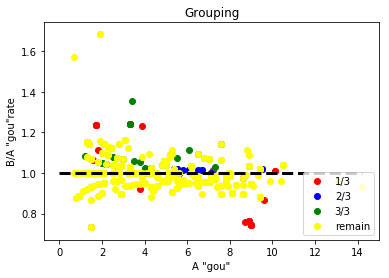

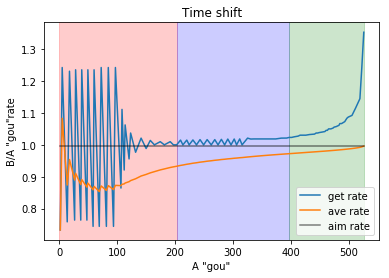

In [133]:
plot_grouping(get_idxes, df_B_pickup, R_aim)
plot_timeshift(get_idxes, df_B_pickup, R_aim)

<b>　グラフは汚いけど、結構理想的なグラフ。というのも、結構バラバラに取りながら中心に近づいていた関係で、最後に調整可能なものを取りやすくなっている。<br>
　ってか、これめちゃ理想やん。</b>

***

<b>【メインプログラムの修正③】<br>
　初期値をどうするか問題。もちろん以下の図のように割合は$1$付近に集まっているため、ランダムサンプリングするとほぼ１になる。すると、学習できっこない。→上記のように「最大値（最小値）を取る」でも良いが、それによって絶対に交換が成立できなくなるのも避けたい……が、仕方がない（学習率を調整してループを回した方が可能性は高まると考えられる。）<br></b>

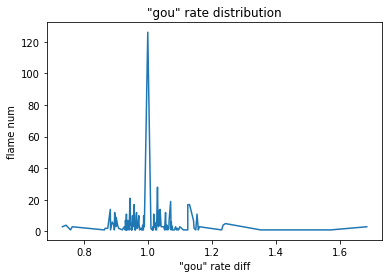

In [112]:
plt.plot(df_B_pickup.groupby("B/A_rate").size())
plt.title('"gou" rate distribution')
plt.xlabel('"gou" rate diff')
plt.ylabel('flame num')
plt.show()

***

<b>【メインプログラムの修正④】<br>
　Bは枠を全て使う必要があるのだろうか？Bの枠の選び方によっては、必ず成立しない、なんて可能性もある<br>
→βが交換に出す枠をランダムサンプリングする、というのは？</b>

***
***

# ●全体的なアルゴリズムの作成

In [224]:
# np.arrayからある値numに最も近い値とそのindexを返す関数
def getNearestValue(arr, num):
    """
    @param arr: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """
    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(arr) - num).argmin()
    return arr[idx], idx

In [192]:
def mini_loop(B_aim, B_arr_, A_aim, A_arr_, R_aim, R_arr_, R_n, h_n=1, eta_0=1, alpha=1, beta=1.01, λ_n=1,):
    """
    【引数の意味】
    @param B_aim : 目標となる合計号数値(B) 割合で代用されているため評価用
    @param B_arr_: 持っている枠の号数の値（評価用）
    @param A_aim : 目標となる合計号数値(A) 基準号数割合
    @param A_arr_: 持っている枠の号数の値
    @param R_aim : 目標となる号数割合
    @param R_arr_: 持っている枠の号数の比率
    @param R_n   : 最初にとる値(今回は最大値)
    @param h_n   : h0の初期値
    @param eta_0 : ηの初期値
    @param beta  : λの更新具合
    @param λ    : 比率を支配
    @return h_n              ：hの最終的な値
    @return λ_n             ：λの最終的な値
    @return (B_sum-B_aim)<0.5：条件を満たしたかのフラグ
    @return idxes            ：Bが交換に利用した枠のid
    
    【関数の中での値の意味】
    @param R_n           : 取った枠の号数割合
    @param idx           : 取った枠のindex
    @param B_aim         : 目標号数(B)までの値
    @param A_arr[idx]*Rn : 取った枠のAの号数
    """
    idxes = [] # とった枠のindexを入れていく。
    A_arr = copy.deepcopy(A_arr_) # 参照先の違うオブジェクトを作成することで、
    B_arr = copy.deepcopy(B_arr_)
    R_arr = copy.deepcopy(R_arr_) # 関数内で利用されても値を変えないようにする。
    A_sum = 0
    B_sum = 0
    count = 0 # 一番下のループの回数
    while(A_aim-A_sum>0):
        R_n, idx = getNearestValue(R_arr, R_n) # 目標の割合に最も近いものを計算する。
        A_sum += A_arr[idx] # 交換に出す枠の合計号数。
        B_sum += B_arr[idx] # 交換に出す枠の合計号数。
        """値の更新"""
        h_n += (R_aim-R_n)**(2*alpha) # hnの値を更新する。
        eta_n = eta_0/h_n**(1/2) # etaの値も更新する。
        R_n_ = (A_aim*R_aim-B_sum)/(A_aim-A_sum) # 最終的に良い枠を取るための補正項。
        R_n = (R_n + 2*eta_n*(R_aim-R_n))*λ_n+(1-λ_n)*R_n_ # Rnの値を更新する。左辺がR_n+1を意味する。
        # ※ここでのR_nは、次はこの値の枠を取りたいなーってこと。
        λ_n = λ_n/beta
        """後処理"""
        R_arr[idx] = -100 # -100で値を修正する。（もう一度選ばれることを避けるため）
        idxes.append(idx) # indexを格納していく。
        if A_aim-A_sum>0.5 and count<10: # 超えたらもう一回やり直し。どうせラストだからλの値が高くなってるだろ読みで他のパラメタは更新しない。
            A_sum -= A_arr[idx]
            B_sum -= B_arr[idx]
            idxes = idxes[:-1]
            count += 1
                    
    return h_n, λ_n, (A_aim-A_sum)<0.5 and (B_sum-B_aim)<0.5, idxes

In [278]:
def main_loop(df_A, df_B):
    """
    関数の概要：交換に使う枠が決まった後から、ループを繰り返して最も良いものを選び取るアルゴリズムを作成する。
    @param df_A：有利な方のデータフレーム （枠数が少ない）
    @param df_B：不利な方のデータフレーム （枠数が多い）
    """    
    start = time.time()
    result = dict()
    while(time.time()-start<1): # 1秒未満の間、ループを繰り返す。
        """有利な方(枠数が少ない方)のデータ"""
        df_A_turn = df_A.sample(frac=0.95) # 交換に使う枠を、ランダムサンプリング
        A_gou_aim = df_A_turn['A_gou'].sum() # 目標値(号数A)
        B_gou_aim = df_A_turn['B_gou'].sum() # 目標値(号数B)
        A_index = df_A_turn.index.tolist()   # 交換に使った枠のindexを記憶
        A_B_rate_aim = B_gou_aim/A_gou_aim   # 目標値(号数の割合)
        Aa_target_sum = df_A_turn["A_target"].sum() # Aが交換に出した枠のAの指定視聴率の合計
        Ab_target_sum = df_A_turn["B_target"].sum() # Aが交換に出した枠のBの指定視聴率の合計
        """不利な方(枠数が多い方)のデータ"""
        A_arr = df_B['A_gou'].values # 交換に出せる枠の号数(A)
        B_arr = df_B['B_gou'].values # 交換に出せる枠の号数（B）
        R_arr = df_B['B/A_rate'].values # 交換に出せる枠の号数割合
        """値の初期化"""
        A_aim = A_gou_aim    # 号数の目標値 
        B_aim = B_gou_aim    # 号数の目標値（こっちは割合で代用。）
        R_aim = A_B_rate_aim # 比率の目標値
        R_n = min(R_arr)     # R0を今持っている値の最小値で初期化。
        """↑ここは、修正の余地あり"""
        alpha=1              # αを1で初期化(つまり、二乗)
        beta=1.01            # βを1.01で初期化
        loop=0               # ループの回数
        flag = False
        """ループを始める。(なお、ここの値はデータ量によっても変わると考えている。)"""
        while flag==False and loop<=10:
            h,λ,flag,B_index = mini_loop(B_aim,B_arr,A_aim,A_arr,R_aim,R_arr,R_n,alpha=alpha,beta=beta)
            if λ>0.30: # λが収束していない
                beta+=1.05
            if h>1.1: # 学習率が抑えられすぎている場合
                alpha+=1
            loop+=1 #ループの回数を記録
        """ループを抜けた(=条件を満たすものが現れたもしくは、ループ回数が10に到達した)"""
        if flag: # うまく交換ができた場合。
            Ba_target_sum = df_B.loc[B_index,:]["A_target"].sum() # Bが交換に出した枠のAの指定視聴率の合計
            Bb_target_sum = df_B.loc[B_index,:]["B_target"].sum() # Bが交換に出した枠のBの指定視聴率の合計
            value = (Ba_target_sum-Aa_target_sum)+(Ab_target_sum-Bb_target_sum)

            result[value]=[A_index,B_index] # 結果を保存する。
    return result

In [279]:
result = main_loop(df_A_pickup, df_B_pickup)

/home/dataartist/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [280]:
print("指定枠視聴率の上昇値は最大で {}".format(max(result.keys())))

指定枠視聴率の上昇値は最大で 239.29999999999995


In [281]:
# それぞれが交換に利用した枠がわかる。
A_turn_index, B_turn_index = result[max(result.keys())]

In [282]:
# Aが交換に出した枠から、その時目指していた値がわかる。
R_aim = df_A_pickup.loc[A_turn_index,]["B_gou"].sum()/df_A_pickup.loc[A_turn_index,]["A_gou"].sum()

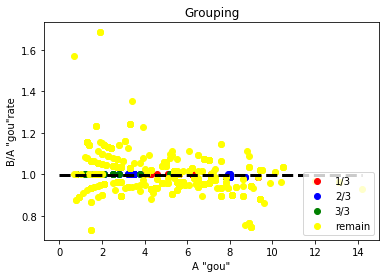

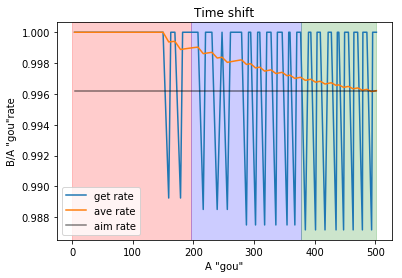

In [283]:
plot_grouping(B_turn_index, df_B_pickup, R_aim)
plot_timeshift(B_turn_index, df_B_pickup, R_aim)

<b>　あとやるべきこと：一回の交換で誤差が0.5だと、積み重なったら大変やんけ…</b>